# Load Data

In [22]:
%matplotlib inline

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

X, y = fetch_openml(data_id=1464, return_X_y=True)
y = y.astype(np.int8)

## Data samples

In [24]:
df = pd.DataFrame(X, columns=["V1", "V2", "V3", "V4"])
df.insert(3, "Class", y)
df.head()

,V1,V2,V3,Class,V4
0,2.0,50.0,12500.0,2,98.0
1,0.0,13.0,3250.0,2,28.0
2,1.0,16.0,4000.0,2,35.0
3,2.0,20.0,5000.0,2,45.0
4,1.0,24.0,6000.0,1,77.0


# Train Model

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        C=1.0,
        penalty='l2',
        multi_class='auto',
        random_state=0,
        class_weight=None, # <- class-weight flag value applied here
        solver='lbfgs',
        max_iter=100,
        l1_ratio=None,
    ),
)
clf.fit(X_train, y_train)
print("Test accuracy: %f" % clf.score(X_test, y_test))

Test accuracy: 0.770053


## Predict Classes

In [26]:
y_pred = clf.predict(X_test)

print("Predicted classes:\n%s\n" % pd.DataFrame(y_pred).value_counts())
print("Actual classes:\n%s" % pd.DataFrame(y_test).value_counts())

Predicted classes:
1    177
2     10
dtype: int64

Actual classes:
Class
1        142
2         45
dtype: int64


## Create ConfusionMatrixDisplay

Precision: 0.600000
Recall: 0.133333


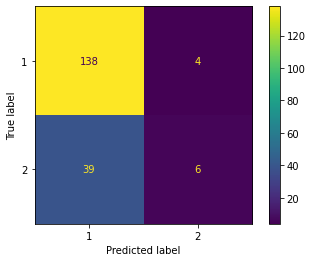

In [27]:
cm = metrics.confusion_matrix(y_test, y_pred)
_ = metrics.ConfusionMatrixDisplay(cm, display_labels=[1,2]).plot()

print("Precision: %f" % metrics.precision_score(y_test, y_pred, pos_label=2))
print("Recall: %f" % metrics.recall_score(y_test, y_pred, pos_label=2))

## ROC Curve Display

Area under the curve: 0.778013


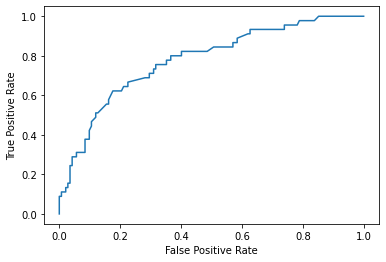

In [28]:
# y_score = clf.fit(X_train, y_train).predict(X_test)
y_score = clf.decision_function(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_score, pos_label=2)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print("Area under the curve: %f" % metrics.auc(fpr, tpr))